In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

sns.set()

# Деревья решений и случайные леса

Случайные леса — пример одного из методов ансамблей (ensemble), основанных
на агрегировании результатов ансамбля более простых оценивателей.
Случайные леса — пример обучаемого ансамбля на основе деревьев принятия решений.

## Деревья принятия решений

Деревья решений — исключительно интуитивно понятные способы классификации или маркирования объектов. По сути, все сводится к классификации путем задания серии уточняющих вопросов.
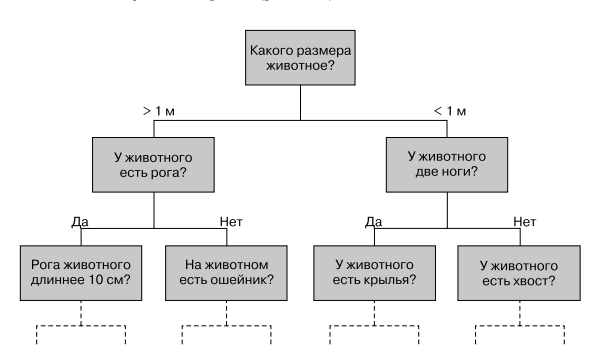

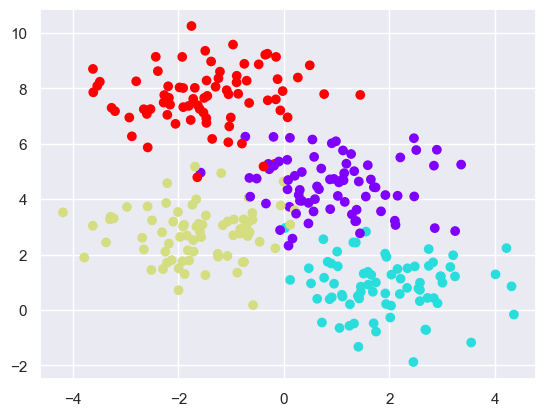

In [3]:
from sklearn.datasets import make_blobs
X, y = make_blobs(300, centers=4, random_state=0, cluster_std=1.0)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='rainbow')

In [7]:
# функция для визуализации классификатора
def visualize_classifier(model, X, y, ax=None, cmap='rainbow'):
    ax = ax or plt.gca()
    
    # Рисуем обучающие точки
    ax.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=cmap,zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # Обучаем оцениватель
    model.fit(X, y)
    xx, yy = np.meshgrid(np.linspace(*xlim, num=200),
    np.linspace(*ylim, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    
    # Создаем цветной график с результатами
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap=cmap,
                           zorder=1)
    ax.set(xlim=xlim, ylim=ylim)

In [14]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier().fit(X, y)

Изменение параметра max_depth
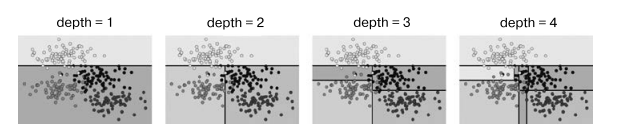

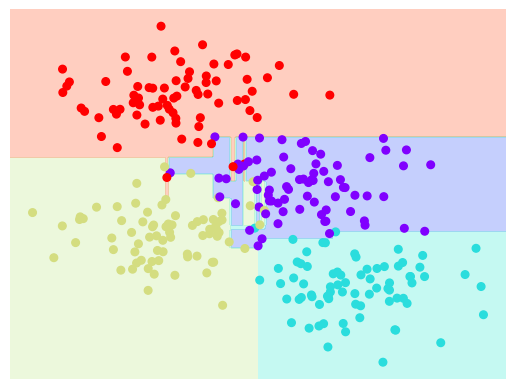

In [16]:
visualize_classifier(tree, X, y)
# видим пример переобучения уже на глубине 5 уровней

## Случайные леса

Идея комбинации нескольких переобученных оценивателей для снижения эффекта этого переобучения лежит в основе метода ансамблей под названием «баггинг» (bagging). Баггинг использует ансамбль параллельно работающих переобучаемых оценивателей и усредняет результаты для получения оптимальной классификации.

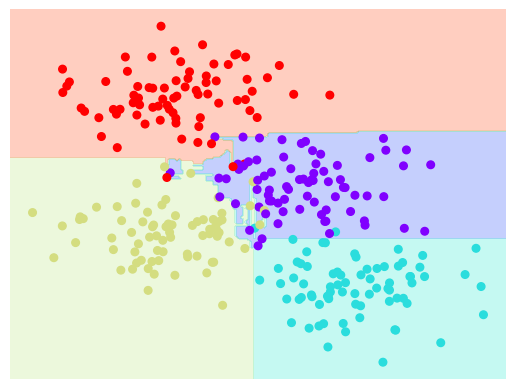

In [18]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier

tree = DecisionTreeClassifier()


bag = BaggingClassifier(tree, n_estimators=100, max_samples=0.8, random_state=1)
# модель
# n_estimators - оличество базовых оценщиков в ансамбле.
# max_samples - размер выборки, которую нужно извлечь из X для обучения каждой базовой оценки
# random_state - управляет случайной повторной выборкой исходного набора данных
bag.fit(X, y)
visualize_classifier(bag, X, y)

В библиотеке Scikit-Learn подобный оптимизированный ансамбль случайных деревьев принятия решений, автоматически выполняющий всю рандомизацию, реализован в оценивателе RandomForestClassifier. Все, что остается сделать, — выбрать
количество оценивателей и он очень быстро (при необходимости параллельно) обучит ансамбль деревьев

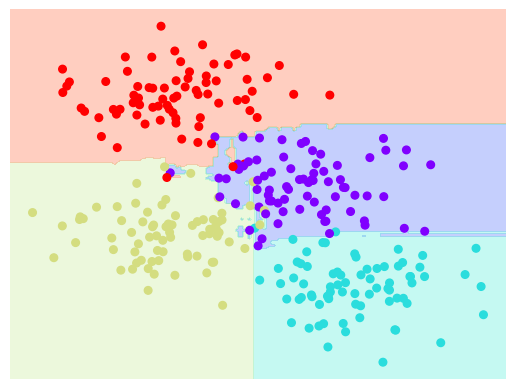

In [19]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, random_state=0)
visualize_classifier(model, X, y)

### Регрессия с помощью случайных лесов

<ErrorbarContainer object of 3 artists>

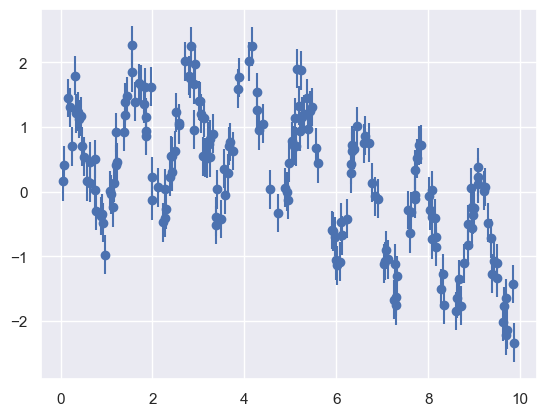

In [25]:
rng = np.random.RandomState(42)
x = 10 * rng.rand(200)
y = np.sin(0.5 * x) + np.sin(5 * x) + 0.3 * rng.randn(len(x))
plt.errorbar(x, y, 0.3, fmt='o')

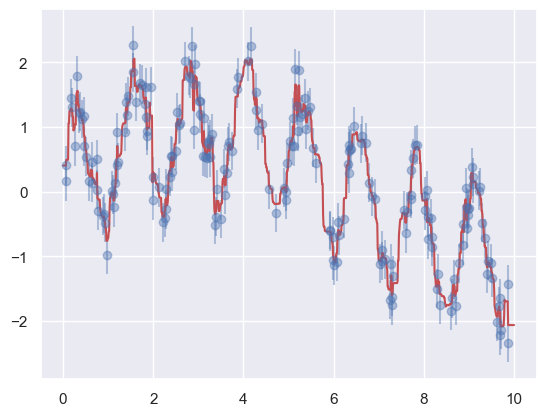

In [30]:
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor(200)
forest.fit(x[:, None], y)

x_fit = np.linspace(0, 10, 1000)
y_fit = forest.predict(xfit[:, None])
y_true = np.sin(0.5 * x_fit) + np.sin(5 * x_fit)

plt.errorbar(x, y, 0.3, fmt='o', alpha=0.4)
plt.plot(x_fit, y_fit, '-r')

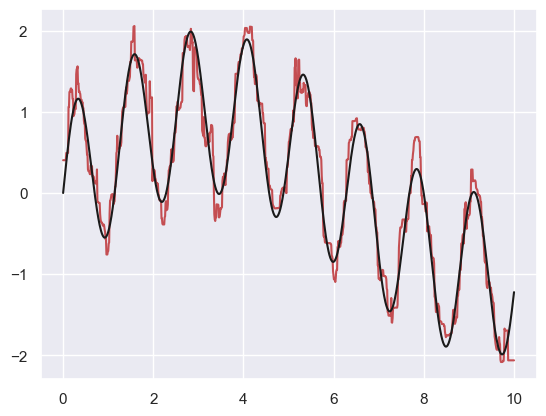

In [31]:
plt.plot(x_fit, y_fit, '-r')  # модель на основе случайного леса
plt.plot(x_fit, y_true, '-k')  # настоящая модель

Случайные леса — мощный метод, обладающий несколькими достоинствами:
- Как обучение, так и предсказание выполняются очень быстро в силу простоты лежащих в основе модели деревьев принятия решений. Кроме того, обе задачи допускают эффективную параллелизацию, так как отдельные деревья представляют собой совершенно независимые сущности.
- Вариант с несколькими деревьями дает возможность использования вероятностной классификации: решение путем «голосования» оценивателей дает оценку вероятности (в библиотеке Scikit-Learn ее можно получить с помощью метода predict_proba()).
- Непараметрическая модель исключительно гибка и может эффективно работать с задачами, на которых другие оцениватели оказываются недообученными.

Основной недостаток случайных лесов состоит в том, что результаты сложно интерпретировать.Чтобы сделать какие-либо выводы относительно смысла модели классификации, случайные леса — не лучший вариант.